In [1]:
# This code uses slope based elimination method for the lines
# draw_lines is created

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
directory = 'test_images/'
os.listdir(directory)
image = mpimg.imread('test_images/solidWhiteCurve.jpg')
image = mpimg.imread('test_images/solidWhiteRight.jpg')
image = mpimg.imread('test_images/solidYellowCurve.jpg')
image = mpimg.imread('test_images/solidYellowCurve2.jpg')
image = mpimg.imread('test_images/solidYellowLeft.jpg')
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [2]:
#image = cv2.imread('test_images/whiteCarLaneSwitch.jpg')
#cv2.imwrite'test_images_results/Test_gray.jpg', image)

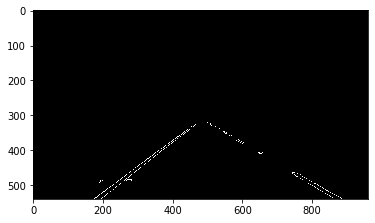

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(masked_edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(490, 315), (490, 315), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(masked_edges, mask)

# Display the image
plt.imshow(masked_edges, cmap='Greys_r')

In [9]:
def draw_lines(img, Hlines, clr, thick):
    ###
    i = 0
    a = [[0] * len(Hlines), [0] * len(Hlines)]
    for pltline in Hlines:
        for x1,y1,x2,y2 in pltline:
            a[0][i] = ((y2-y1)/(x2-x1))
            a[1][i] = ((y2-y1)**2 + (x2-x1)**2)**(1/2)
            i = i + 1
    ###
    aPos = [i for i in a[0] if i > 0]
    aPosLen = [a[1][a[0].index(i)] for i in a[0] if i > 0]
    aNeg = [i for i in a[0] if i <= 0]
    aNegLen = [a[1][a[0].index(i)] for i in a[0] if i <= 0]
    aAveAbs = sum(list(map(abs, a[0])))/len(a[0])
    ###
    aNegX = [i for i in aNeg if abs(abs(i)-aAveAbs)<0.2]
    aNegLenX = [a[1][a[0].index(i)] for i in aNegX]
    AveNegRate = [(i-min(aNegLenX))/(max(aNegLenX)-min(aNegLenX)) for i in aNegLenX]
    aNegXRated = [i*aNegX[AveNegRate.index(i)] for i in AveNegRate]
    SlopeNeg = sum(aNegXRated)/sum(AveNegRate)
    #
    aPosX = [i for i in aPos if abs(abs(i)-aAveAbs)<0.2]
    aPosLenX = [a[1][a[0].index(i)] for i in aPosX]
    AvePosRate = [(i-min(aPosLenX))/(max(aPosLenX)-min(aPosLenX)) for i in aPosLenX]
    aPosXRated = [i*aPosX[AvePosRate.index(i)] for i in AvePosRate]
    SlopePos = sum(aPosXRated)/sum(AvePosRate)
    ###
    NegLines = [Hlines[a[0].index(i)] for i in aNegX]
    i = 0
    xyNeg = [[0] * len(NegLines), [0] * len(NegLines), [0] * len(NegLines), [0] * len(NegLines)]
    for pltline in NegLines:
        for x1,y1,x2,y2 in pltline:
            xyNeg[0][i] = x1
            xyNeg[1][i] = x2
            xyNeg[2][i] = y1
            xyNeg[3][i] = y2
            i = i + 1
    x1Neg = sum(xyNeg[0])/len(xyNeg[0])
    x2Neg = sum(xyNeg[1])/len(xyNeg[0])
    y1Neg = sum(xyNeg[2])/len(xyNeg[0])
    y2Neg = sum(xyNeg[3])/len(xyNeg[0])
    #
    PosLines = [Hlines[a[0].index(i)] for i in aPosX]
    i = 0
    xyPos = [[0] * len(PosLines), [0] * len(PosLines), [0] * len(PosLines), [0] * len(PosLines)]
    for pltline in PosLines:
        for x1,y1,x2,y2 in pltline:
            xyPos[0][i] = x1
            xyPos[1][i] = x2
            xyPos[2][i] = y1
            xyPos[3][i] = y2
            i = i + 1
    x1Pos = sum(xyPos[0])/len(xyPos[0])
    x2Pos = sum(xyPos[1])/len(xyPos[0])
    y1Pos = sum(xyPos[2])/len(xyPos[0])
    y2Pos = sum(xyPos[3])/len(xyPos[0])
    ###
    yMax = img.shape[0]
    XStartNeg = int(((yMax-y1Neg)/SlopeNeg)+x1Neg)
    XStartPos = int(((yMax-y1Pos)/SlopePos)+x1Pos)
    XStopNeg = int(((320-y1Neg)/SlopeNeg)+x1Neg)
    XStopPos = int(((320-y1Pos)/SlopePos)+x1Pos)
    #inpsNeg = list(range(XStartNeg, max(xyNeg[1])))
    inpsNeg = list(range(XStartNeg, XStopNeg))
    youtNeg = [SlopeNeg*(i-x1Neg) + y1Neg for i in inpsNeg]
    #inpsPos= list(range(min(xyPos[0]), XStartPos))
    inpsPos= list(range(XStopPos, XStartPos))
    youtPos = [SlopePos*(i-x1Pos) + y1Pos for i in inpsPos]
    ###
    line_image = np.copy(img)*0
    LinesNew = [min(inpsNeg),max(inpsNeg),max(youtNeg),min(youtNeg)]
    LinesNew = [int(i) for i in LinesNew]
    cv2.line(line_image,(LinesNew[0],LinesNew[2]),(LinesNew[1],LinesNew[3]),clr,thick)
    LinesNew = [min(inpsPos),max(inpsPos),min(youtPos),max(youtPos)]
    LinesNew = [int(i) for i in LinesNew]
    cv2.line(line_image,(LinesNew[0],LinesNew[2]),(LinesNew[1],LinesNew[3]),clr,thick)
    ###
    return line_image

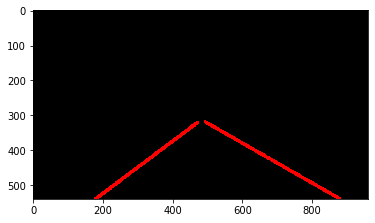

In [10]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2
theta = 1*np.pi/180
threshold = 15
min_line_length = 20
max_line_gap = 25
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
                            
linesx = draw_lines(image, lines, [255, 0, 0], 10)
plt.imshow(linesx)

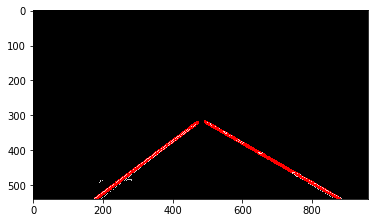

In [11]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combox = cv2.addWeighted(color_edges, 0.8, linesx, 1, 0) 
plt.imshow(combox)

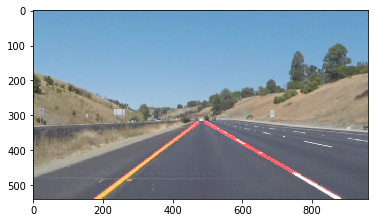

In [12]:
ResultImage = cv2.addWeighted(image, 1, linesx, 1, 0) 
plt.imshow(ResultImage)
#plt.savefig('test_images_results/ResultImage.jpg')

In [13]:
linesy = draw_lines(image, lines, [0, 0, 255], 10)
imagex = cv2.imread('test_images/whiteCarLaneSwitch.jpg')
ResultImage = cv2.addWeighted(imagex, 1, linesy, 1, 0) 
cv2.imshow('image',ResultImage)
cv2.waitKey(0)
cv2.imwrite('test_images_results/Test_gray.jpg', ResultImage)

True

In [ ]:
#for file in os.listdir('test_images/'): image = mpimg.imread(directory+file)
#plt.imshow(image)

In [ ]:
#pip install opencv-python
#pip install moviepy

In [6]:
import numpy as np
import cv2

cap = cv2.VideoCapture('test_videos/solidWhiteRight.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',gray)
        cv2.waitKey(100)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()